Load the RDF data dump

In [16]:
%%time

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from rdflib import ConjunctiveGraph

ns = {"nb": "http://bise-eu.info/core-ontology#",
      "dc": "http://dcterms/",
      "p-plan": "http://purl.org/net/p-plan#",
      "edam": "http://purl.obolibrary.org/obo/edam#"}

g = ConjunctiveGraph()
#g.parse("bise-linked-data-webapp/static/data/neubias-dump-20180129.ttl", format="turtle")
#g.parse("data-dumps/latest/neubias-latest.ttl", format="turtle")

### latest version of the RDF dataset dump
g.parse("https://github.com/NeuBIAS/bise-core-ontology/raw/master/data-dumps/latest/neubias-latest.ttl", format="turtle")
g.parse("bise-linked-data-webapp/static/data/EDAM-bioimaging_alpha03.owl")
print(str(len(g)) + ' triples in Biii data graph')

21713 triples in Biii data graph
CPU times: user 1.83 s, sys: 26.4 ms, total: 1.85 s
Wall time: 3.17 s


# Level-0 entries

1310


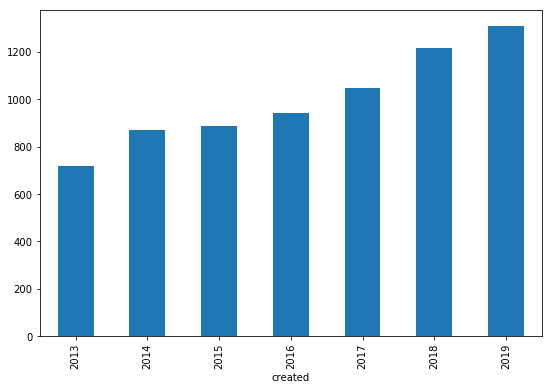

In [13]:
%matplotlib inline

#plt.figure(figsize=(16, 10))
plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT ?soft ?date WHERE {
    ?soft a <http://biii.eu/node/software> .
    ?soft dc:created ?date .
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':r['soft'], 'created':r['date']})

print(len(soft_dates))

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

# Sparse entries

758


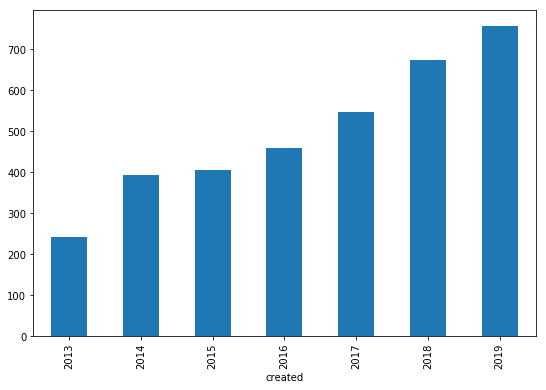

In [14]:
#%%time
%matplotlib inline

#plt.figure(figsize=(16, 10))
plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT DISTINCT ?soft ?date WHERE {
    ?soft a <http://biii.eu/node/software> .
    ?soft dc:created ?date .
    ?soft dc:title ?title .
    ?soft rdfs:comment ?description .
    FILTER (
        NOT EXISTS {?soft nb:hasImplementation ?i} 
        || NOT EXISTS {?soft nb:hasLocation ?loc} 
        || NOT EXISTS {?soft nb:hasIllustration ?ill} 
        || NOT EXISTS {?soft nb:hasAuthor ?auth}
        || NOT EXISTS {?soft nb:hasFunction ?func}
        || NOT EXISTS {?soft nb:openess ?lic_op}
        || NOT EXISTS {?soft nb:hasLicense ?lic}
        || NOT EXISTS {?soft nb:hasSupportedImageDimension ?dim}
        || NOT EXISTS {?soft nb:requires ?dep}
        || NOT EXISTS {?soft nb:hasProgrammingLanguage ?prog}
        || NOT EXISTS {?soft nb:hasPlatform ?plat}
        || NOT EXISTS {?soft nb:hasTopic ?topic}
        || NOT EXISTS {?soft nb:hasReferencePublication ?ref}
        || NOT EXISTS {?soft nb:hasDocumentation ?doc}
        || NOT EXISTS {?soft nb:hasComparison ?comp}
        || NOT EXISTS {?soft nb:hasDOI ?doi}
        || NOT EXISTS {?soft nb:hasUsageExample ?usag}
        || NOT EXISTS {?soft nb:hasTrainingMaterial ?train}
    )
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':r['soft'], 'created':r['date']})

print(len(soft_dates))
df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()
#df2

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

# Detailed entries

58


,created,soft
0,2018-10-17 12:46:16,http://biii.eu/node/1357
1,2018-02-04 15:23:45,http://biii.eu/node/1220
2,2018-01-28 12:24:07,http://biii.eu/node/1171
3,2018-10-18 11:59:10,http://biii.eu/node/1374
4,2019-04-18 14:46:49,http://biii.eu/node/1556
5,2018-01-30 16:57:04,http://biii.eu/node/1203
6,2018-06-29 12:22:13,http://biii.eu/node/1332
7,2019-03-08 11:11:52,http://biii.eu/node/1470
8,2018-01-28 12:39:13,http://biii.eu/node/1175
9,2019-10-16 14:44:37,http://biii.eu/node/1586


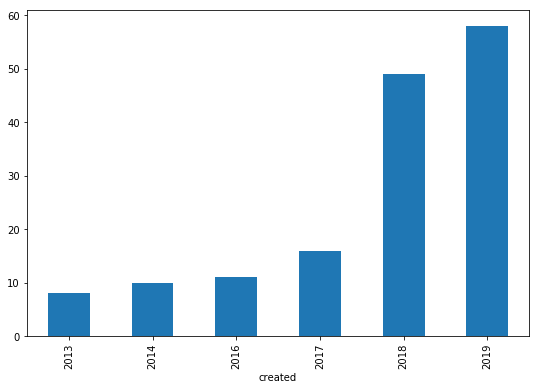

In [11]:
%matplotlib inline

#plt.figure(figsize=(16, 10))
plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT DISTINCT ?soft ?date WHERE {
    ?soft a <http://biii.eu/node/software> .
    ?soft dc:created ?date .
    ?soft dc:title ?title .
    ?soft rdfs:comment ?description .
    ?soft nb:hasImplementation ?i .
    ?soft nb:hasLocation ?loc .
    ?soft nb:hasIllustration ?ill .
    ?soft nb:hasAuthor ?auth .
    ?soft nb:hasFunction ?func .
    ?soft nb:openess ?lic_op .
    ?soft nb:hasLicense ?lic .
    
    ?soft nb:hasSupportedImageDimension|nb:requires ?usage .
    
    ?soft nb:hasProgrammingLanguage ?prog .
    ?soft nb:hasPlatform ?plat .
    ?soft nb:hasTopic ?topic .

}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':r['soft'], 'created':r['date']})

print(len(soft_dates))

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

df

# Comprehensive entries

2


,created,soft
0,2018-12-09 18:41:11,http://biii.eu/node/1397
1,2018-03-20 17:53:11,http://biii.eu/node/1276


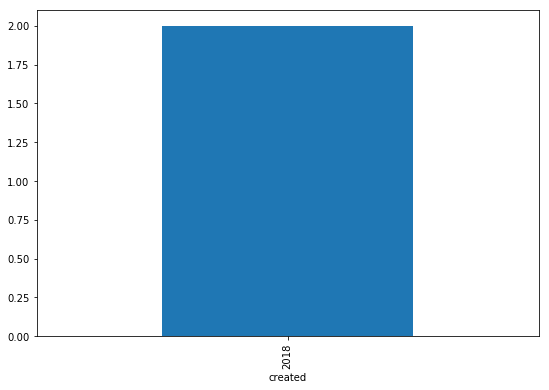

In [15]:
%matplotlib inline

#plt.figure(figsize=(16, 10))
plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT DISTINCT ?soft ?date WHERE {
    ?soft a <http://biii.eu/node/software> .
    ?soft dc:created ?date .
    ?soft dc:title ?title .
    ?soft rdfs:comment ?description .
    ?soft nb:hasImplementation ?i .
    ?soft nb:hasLocation ?loc .
    ?soft nb:hasIllustration ?ill .
    ?soft nb:hasAuthor ?auth .
    ?soft nb:hasFunction ?func .
    ?soft nb:openess ?lic_op .
    ?soft nb:hasLicense ?lic .
    
    ?soft nb:hasSupportedImageDimension|nb:requires ?usage .
    
    ?soft nb:hasProgrammingLanguage ?prog .
    ?soft nb:hasPlatform ?plat .
    ?soft nb:hasTopic ?topic .
    
    ?soft nb:hasReferencePublication|nb:hasDocumentation|nb:hasComparison ?ref .
    ?soft nb:hasDOI ?doi .
    ?soft nb:hasUsageExample|nb:hasTrainingMaterial ?train
    
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':r['soft'], 'created':r['date']})

print(len(soft_dates))

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

df